In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


## Verificare daca exista valori NaN

In [3]:
df.isna().any().any()

np.False_

## Verificare matrice de corelatie
### Heatmap

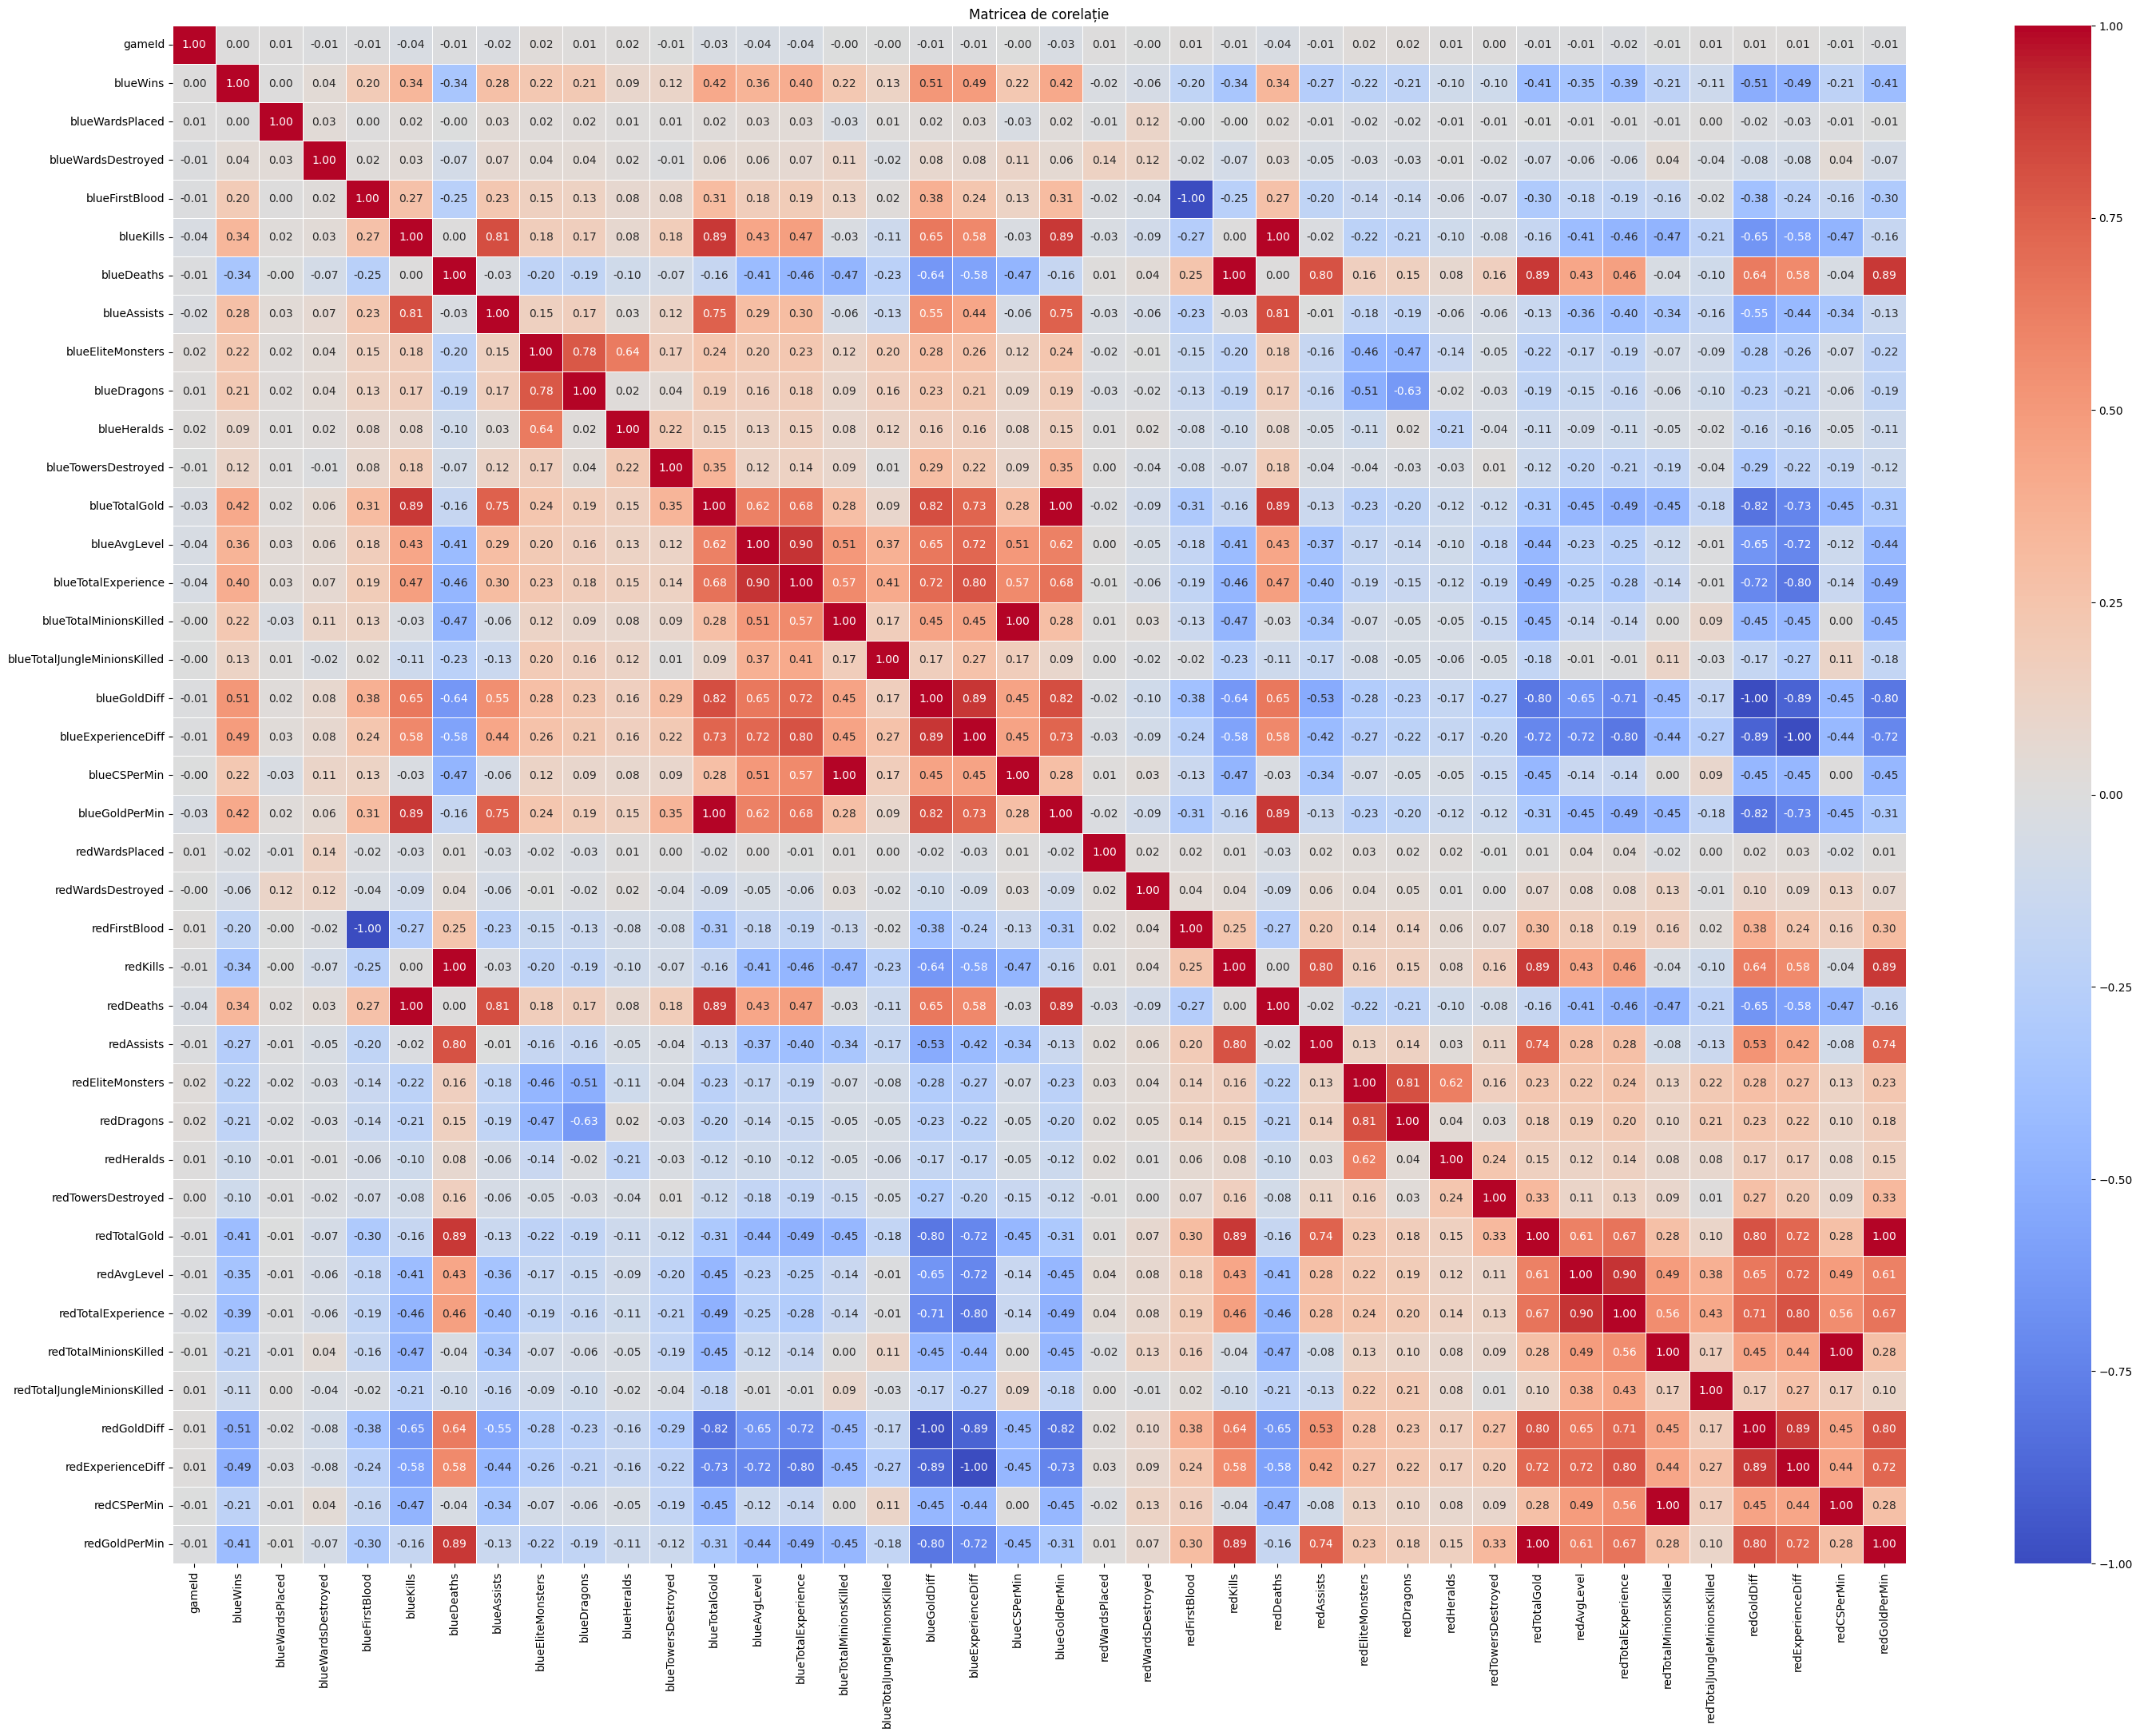

In [4]:
correlation_matrix = df.corr()

# Afișează matricea de corelație
correlation_matrix
plt.figure(figsize=(35, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matricea de corelație')
plt.show()


## Verificare daca exista corelatii cu valori mai mari de 0.95

In [5]:
corr_unstack = correlation_matrix.unstack().reset_index()
corr_unstack.columns = ['var1', 'var2', 'correlation']

# Filtrează corelațiile mai mari de 0.95 și elimină auto-corelațiile (variabilă cu ea însăși)
high_corr = corr_unstack[(abs(corr_unstack['correlation']) > 0.95) & 
                         (corr_unstack['var1'] != corr_unstack['var2'])]

# Elimină duplicate (A-B și B-A reprezintă aceeași corelație)
high_corr = high_corr[high_corr['var1'] < high_corr['var2']]

# Sortează rezultatele după valoarea corelației (descrescător)
high_corr = high_corr.sort_values('correlation', ascending=False)

# Afișează rezultatele
high_corr


,var1,var2,correlation
775,blueCSPerMin,blueTotalMinionsKilled,1.0
812,blueGoldPerMin,blueTotalGold,1.0
1591,redGoldPerMin,redTotalGold,1.0
264,blueDeaths,redKills,1.0
225,blueKills,redDeaths,1.0
1554,redCSPerMin,redTotalMinionsKilled,1.0
757,blueExperienceDiff,redExperienceDiff,-1.0
716,blueGoldDiff,redGoldDiff,-1.0
183,blueFirstBlood,redFirstBlood,-1.0


## Eliminarea corelatiilor mai mari de 0.95 , pastrarea variabilei Redkills in schimbul BlueDeaths

In [6]:
# Creează o listă de coloane de eliminat bazată pe corelațiile mari
columns_to_drop = []

# Parcurge toate perechile de variabile puternic corelate
for _, row in high_corr.iterrows():
    var1, var2 = row['var1'], row['var2']
    
    # Cazul specific: dacă perechea conține blueDeaths și redKills
    if ('blueDeaths' in [var1, var2] and 'redKills' in [var1, var2]):
        columns_to_drop.append('blueDeaths')  # Elimină întotdeauna blueDeaths
    else:
        # Altfel, păstrează comportamentul original
        columns_to_drop.append(var2)

# Elimină duplicate din lista de coloane (dacă există)
columns_to_drop = list(set(columns_to_drop))

# Creează un nou DataFrame fără variabilele puternic corelate
df = df.drop(columns=columns_to_drop)

# Afișează câte coloane au fost eliminate
print(f"Au fost eliminate {len(columns_to_drop)} coloane din {df.shape[1]} (rămase {df.shape[1]}):")
print(columns_to_drop)

# Afișează noul DataFrame
df.head()


Au fost eliminate 9 coloane din 31 (rămase 31):
['redTotalGold', 'redTotalMinionsKilled', 'redFirstBlood', 'redDeaths', 'blueDeaths', 'redExperienceDiff', 'blueTotalMinionsKilled', 'redGoldDiff', 'blueTotalGold']


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,11,0,0,0,...,8,0,0,0,0,6.8,17047,55,19.7,1656.7
1,4523371949,0,12,1,0,5,5,0,0,0,...,2,2,1,1,1,6.8,17438,52,24.0,1762.0
2,4521474530,0,15,0,0,7,4,1,1,0,...,14,0,0,0,0,6.8,17254,28,20.3,1728.5
3,4524384067,0,43,1,0,4,5,1,0,1,...,10,0,0,0,0,7.0,17961,47,23.5,1647.8
4,4436033771,0,75,4,0,6,6,0,0,0,...,7,1,1,0,0,7.0,18313,67,22.5,1740.4


## Verificare daca exista duplicate

In [7]:

duplicate_count = df.duplicated().sum()

# Afișează rezultatul
print(f"Număr de rânduri duplicate: {duplicate_count}")

# Dacă există duplicate, afișează-le
if duplicate_count > 0:
    print("\nExemple de rânduri duplicate:")
    duplicates = df[df.duplicated(keep='first')]
    display(duplicates.head())
    
    # Opțional: Afișează toate duplicatele cu rândurile originale
    print("\nToate rândurile duplicate și originalele lor:")
    all_duplicates = df[df.duplicated(keep=False)]
    display(all_duplicates.sort_values(by=all_duplicates.columns.tolist()))


Număr de rânduri duplicate: 0


##  Verificare daca exista valori NULL

In [8]:
has_null = df.isnull().values.any()
print(f"DataFrame-ul conține valori null: {has_null}")

# Numărul total de valori null
total_null = df.isnull().sum().sum()
print(f"Numărul total de valori null: {total_null}")


DataFrame-ul conține valori null: False
Numărul total de valori null: 0


## Histograma


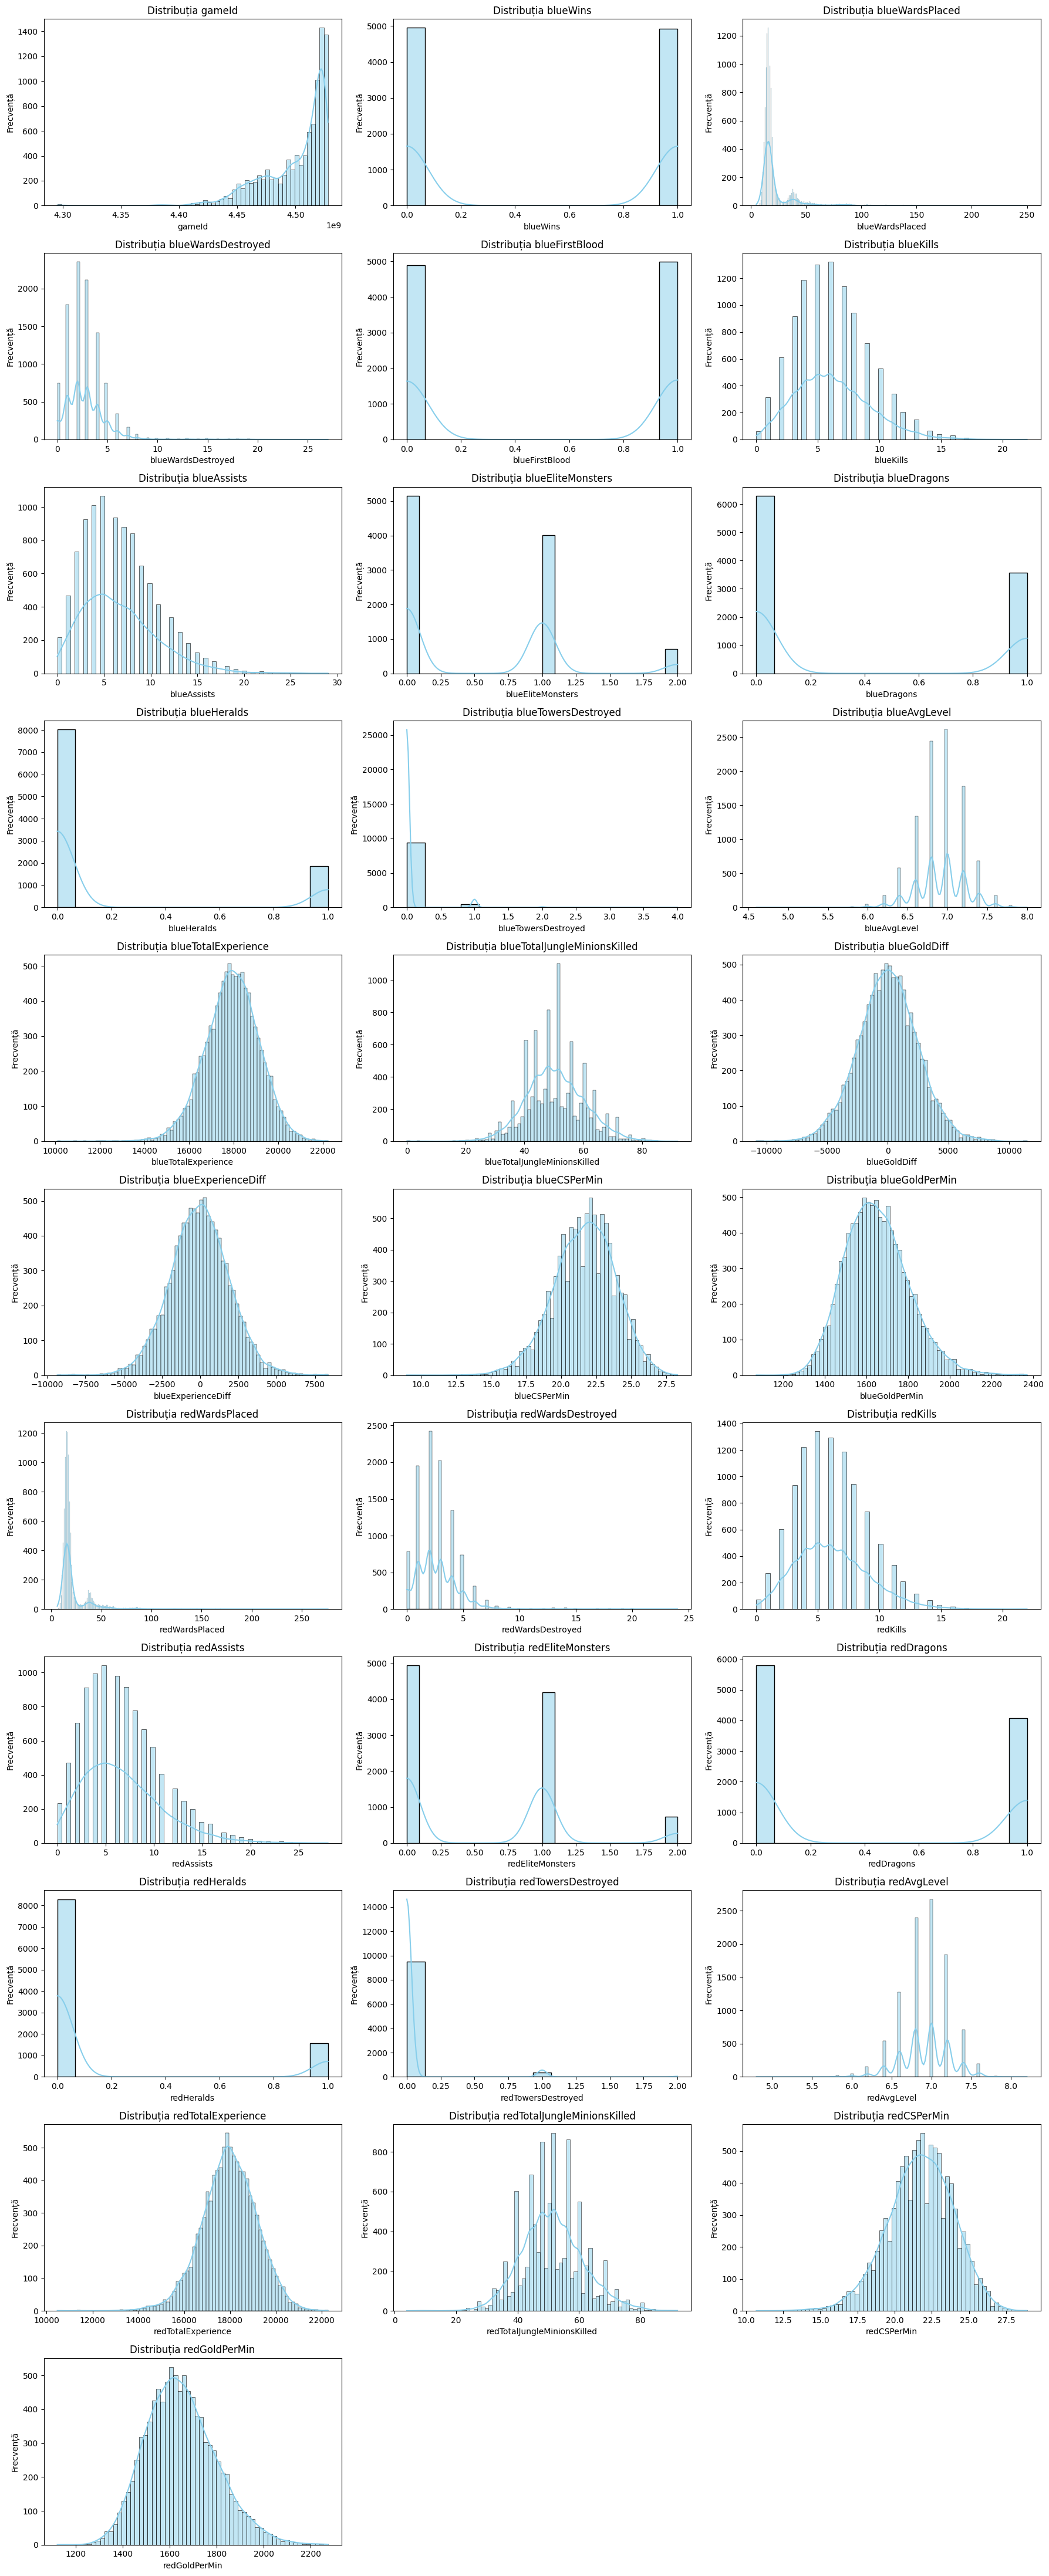

In [9]:

# Selectează doar coloanele numerice
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)

# Calculează numărul de rânduri și coloane pentru subplot grid
import math
n_rows = math.ceil(num_cols / 3)

# Creează histograme pentru toate coloanele numerice
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribuția {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecvență')
    
# Ascunde axele rămase nefolosite (dacă există)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()


## Describe

In [10]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.645106,0.549954,0.361980,0.187974,...,6.662112,0.573135,0.413098,0.160036,0.043021,6.925316,17961.730438,51.313088,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,4.064520,0.625527,0.480597,0.390712,...,4.060612,0.626482,0.492415,0.366658,0.216900,0.305311,1198.583912,10.027885,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,10465.000000,4.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,6.800000,17209.500000,44.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,7.000000,17974.000000,51.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,9.000000,1.000000,1.000000,0.000000,0.000000,7.200000,18764.500000,57.000000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,28.000000,2.000000,1.000000,1.000000,2.000000,8.200000,22269.000000,92.000000,28.900000,2273.200000


## ENTROPIE


Entropy for each column:
gameId (binned): 1.7355
blueWins: 1.0000
blueWardsPlaced (binned): 0.8771
blueWardsDestroyed (binned): 1.3830
blueFirstBlood: 0.9999
blueKills (binned): 2.4926
blueAssists (binned): 2.4014
blueEliteMonsters: 1.2906
blueDragons: 0.9443
blueHeralds: 0.6972
blueTowersDestroyed: 0.2947
blueAvgLevel (binned): 1.9554
blueTotalExperience (binned): 2.0710
blueTotalJungleMinionsKilled (binned): 2.1853
blueGoldDiff (binned): 2.2306
blueExperienceDiff (binned): 2.2094
blueCSPerMin (binned): 2.2618
blueGoldPerMin (binned): 2.3001
redWardsPlaced (binned): 0.8142
redWardsDestroyed (binned): 1.5322
redKills (binned): 2.4671
redAssists (binned): 2.4182
redEliteMonsters: 1.3020
redDragons: 0.9781
redHeralds: 0.6344
redTowersDestroyed: 0.2578
redAvgLevel (binned): 2.0058
redTotalExperience (binned): 2.1119
redTotalJungleMinionsKilled (binned): 2.2555
redCSPerMin (binned): 2.3415
redGoldPerMin (binned): 2.4355


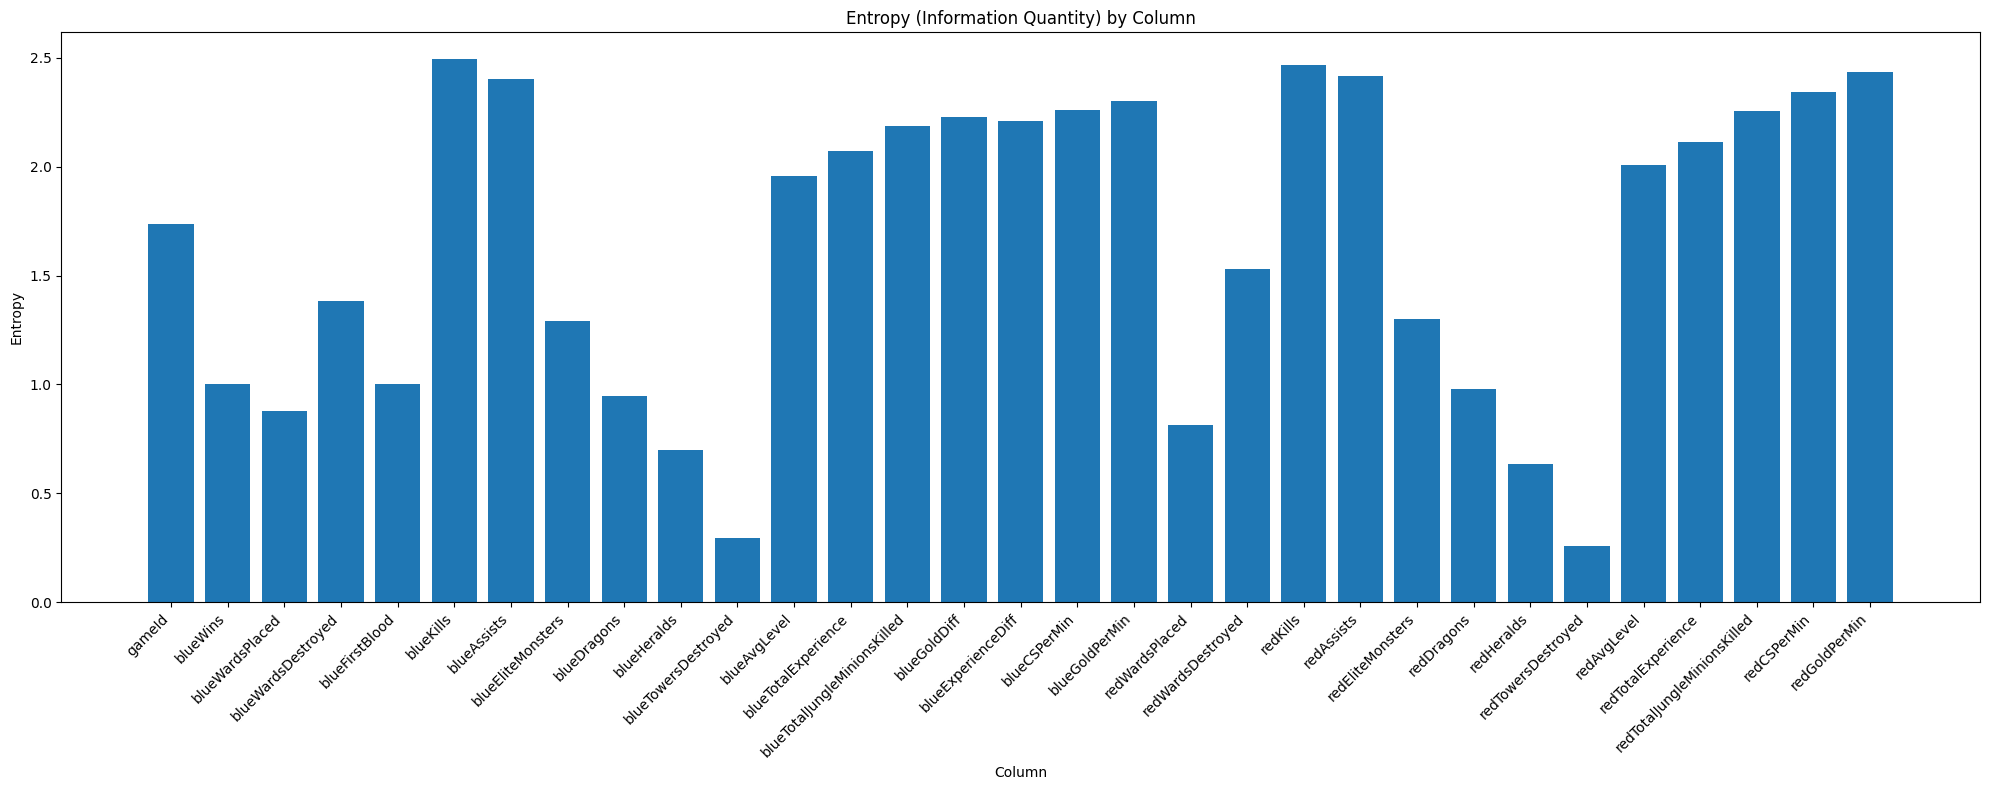

In [11]:
from math import log2

def calculate_entropy(column):
    """
    Calculate entropy (information quantity) for a column
    Entropy = -sum(p_i * log2(p_i)) for all values i
    """
    # Get value counts and convert to probabilities
    value_counts = column.value_counts(normalize=True)
    
    # Calculate entropy using the formula: -sum(p_i * log2(p_i))
    # Skip zero probabilities to avoid log(0) error
    entropy = -sum(p * log2(p) for p in value_counts if p > 0)
    
    return entropy

# Calculate entropy for each column
print("\nEntropy for each column:")
for column in df.columns:
    # For numeric columns, we can bin them into categories for entropy calculation
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() > 10:
        # Create 10 bins for numeric data
        binned_data = pd.cut(df[column].dropna(), bins=10)
        entropy_value = calculate_entropy(binned_data)
        print(f"{column} (binned): {entropy_value:.4f}")
    else:
        # For categorical or low-cardinality numeric columns
        entropy_value = calculate_entropy(df[column])
        print(f"{column}: {entropy_value:.4f}")

# Visualization for a few selected columns (up to 5)
selected_columns = df.columns  # Change this to select specific columns

plt.figure(figsize=(20, 8))
entropy_values = []

for i, column in enumerate(selected_columns):
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() > 10:
        binned_data = pd.cut(df[column].dropna(), bins=10)
        entropy_value = calculate_entropy(binned_data)
    else:
        entropy_value = calculate_entropy(df[column])
    
    entropy_values.append(entropy_value)

# Create bar chart
plt.bar(selected_columns, entropy_values)
plt.title('Entropy (Information Quantity) by Column')
plt.xlabel('Column')
plt.ylabel('Entropy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## GINI INDEX

In [12]:
def calculate_gini(column):
    """Calculate Gini impurity for a column"""
    # Get value counts and convert to probabilities
    value_counts = column.value_counts(normalize=True)
    
    # Calculate Gini using the formula: 1 - sum(p_i^2)
    gini = 1 - sum(p**2 for p in value_counts)
    
    return gini

# Example usage (to add to your notebook):
print("\nGini index for each column:")
for column in df.columns:  # First 5 columns
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() > 10:
        # Create bins for numeric data
        binned_data = pd.cut(df[column].dropna(), bins=10)
        gini_value = calculate_gini(binned_data)
        print(f"{column} (binned): {gini_value:.4f}")
    else:
        gini_value = calculate_gini(df[column])
        print(f"{column}: {gini_value:.4f}")
        
    


Gini index for each column:
gameId (binned): 0.6085
blueWins: 0.5000
blueWardsPlaced (binned): 0.2877
blueWardsDestroyed (binned): 0.5641
blueFirstBlood: 0.5000
blueKills (binned): 0.8028
blueAssists (binned): 0.7813
blueEliteMonsters: 0.5574
blueDragons: 0.4619
blueHeralds: 0.3053
blueTowersDestroyed: 0.0898
blueAvgLevel (binned): 0.6957
blueTotalExperience (binned): 0.7196
blueTotalJungleMinionsKilled (binned): 0.7436
blueGoldDiff (binned): 0.7477
blueExperienceDiff (binned): 0.7443
blueCSPerMin (binned): 0.7565
blueGoldPerMin (binned): 0.7615
redWardsPlaced (binned): 0.2733
redWardsDestroyed (binned): 0.5968
redKills (binned): 0.7996
redAssists (binned): 0.7830
redEliteMonsters: 0.5629
redDragons: 0.4849
redHeralds: 0.2688
redTowersDestroyed: 0.0772
redAvgLevel (binned): 0.7170
redTotalExperience (binned): 0.7255
redTotalJungleMinionsKilled (binned): 0.7507
redCSPerMin (binned): 0.7696
redGoldPerMin (binned): 0.7835


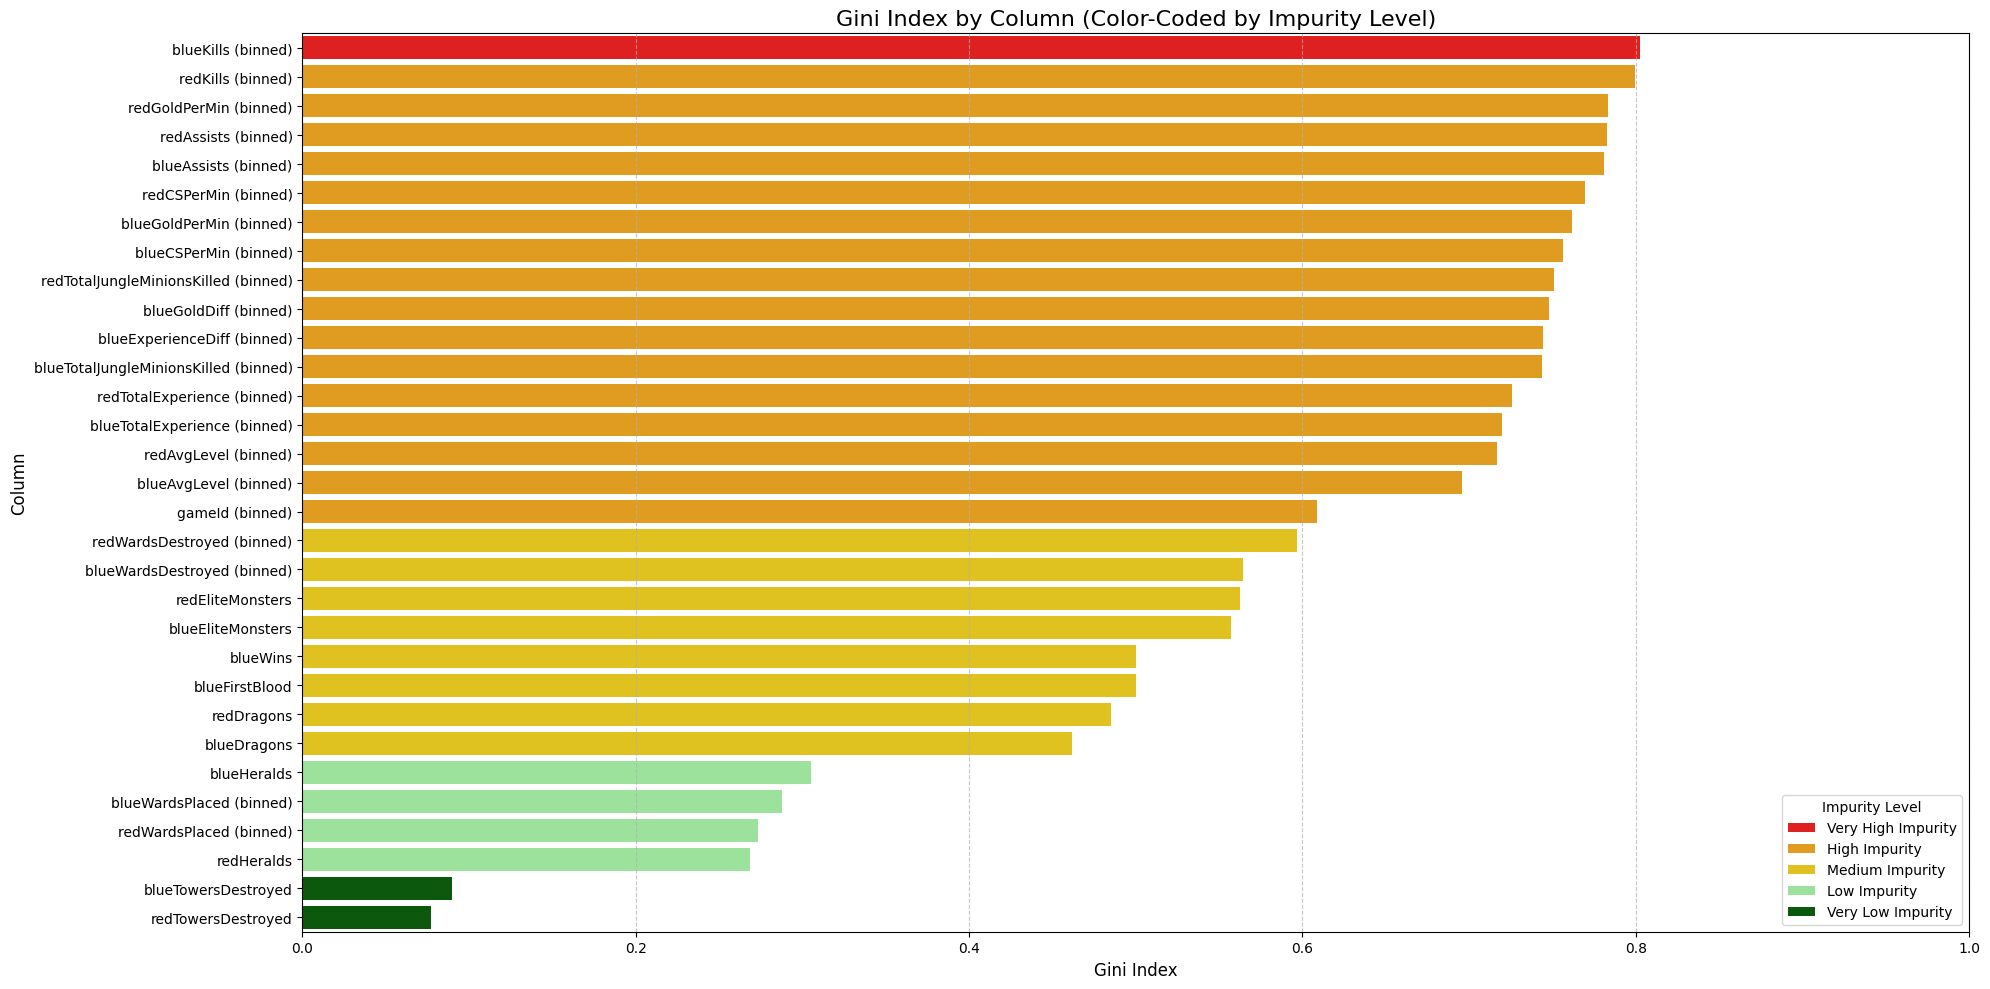

In [13]:
# Store column names and their Gini values
column_names = []
gini_values = []

# Calculate Gini index for each column and store the results
for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and df[column].nunique() > 10:
        # Create bins for numeric data
        binned_data = pd.cut(df[column].dropna(), bins=10)
        gini_value = calculate_gini(binned_data)
        column_names.append(f"{column} (binned)")
        gini_values.append(gini_value)
    else:
        gini_value = calculate_gini(df[column])
        column_names.append(column)
        gini_values.append(gini_value)

# Create a DataFrame for visualization
gini_df = pd.DataFrame({'Column': column_names, 'Gini Index': gini_values})

# Sort by Gini value to make the chart more readable
gini_df = gini_df.sort_values(by='Gini Index', ascending=False)

# Define impurity categories
def impurity_category(gini):
    if gini < 0.2:
        return "Very Low Impurity"
    elif gini < 0.4:
        return "Low Impurity"
    elif gini < 0.6:
        return "Medium Impurity"
    elif gini < 0.8:
        return "High Impurity"
    else:
        return "Very High Impurity"

gini_df['Impurity Level'] = gini_df['Gini Index'].apply(impurity_category)

# Set color palette based on impurity level
color_map = {
    "Very Low Impurity": "darkgreen",
    "Low Impurity": "lightgreen",
    "Medium Impurity": "gold",
    "High Impurity": "orange",
    "Very High Impurity": "red"
}

# Create the color-coded visualization
plt.figure(figsize=(20, 10))
sns.barplot(x='Gini Index', y='Column', data=gini_df, 
            hue='Impurity Level', palette=color_map, dodge=False)
plt.title('Gini Index by Column (Color-Coded by Impurity Level)', fontsize=16)
plt.xlabel('Gini Index', fontsize=12)
plt.ylabel('Column', fontsize=12)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Impurity Level', loc='lower right')
plt.tight_layout()
plt.show()

## TOP 10 CORELATII + HEATMAP

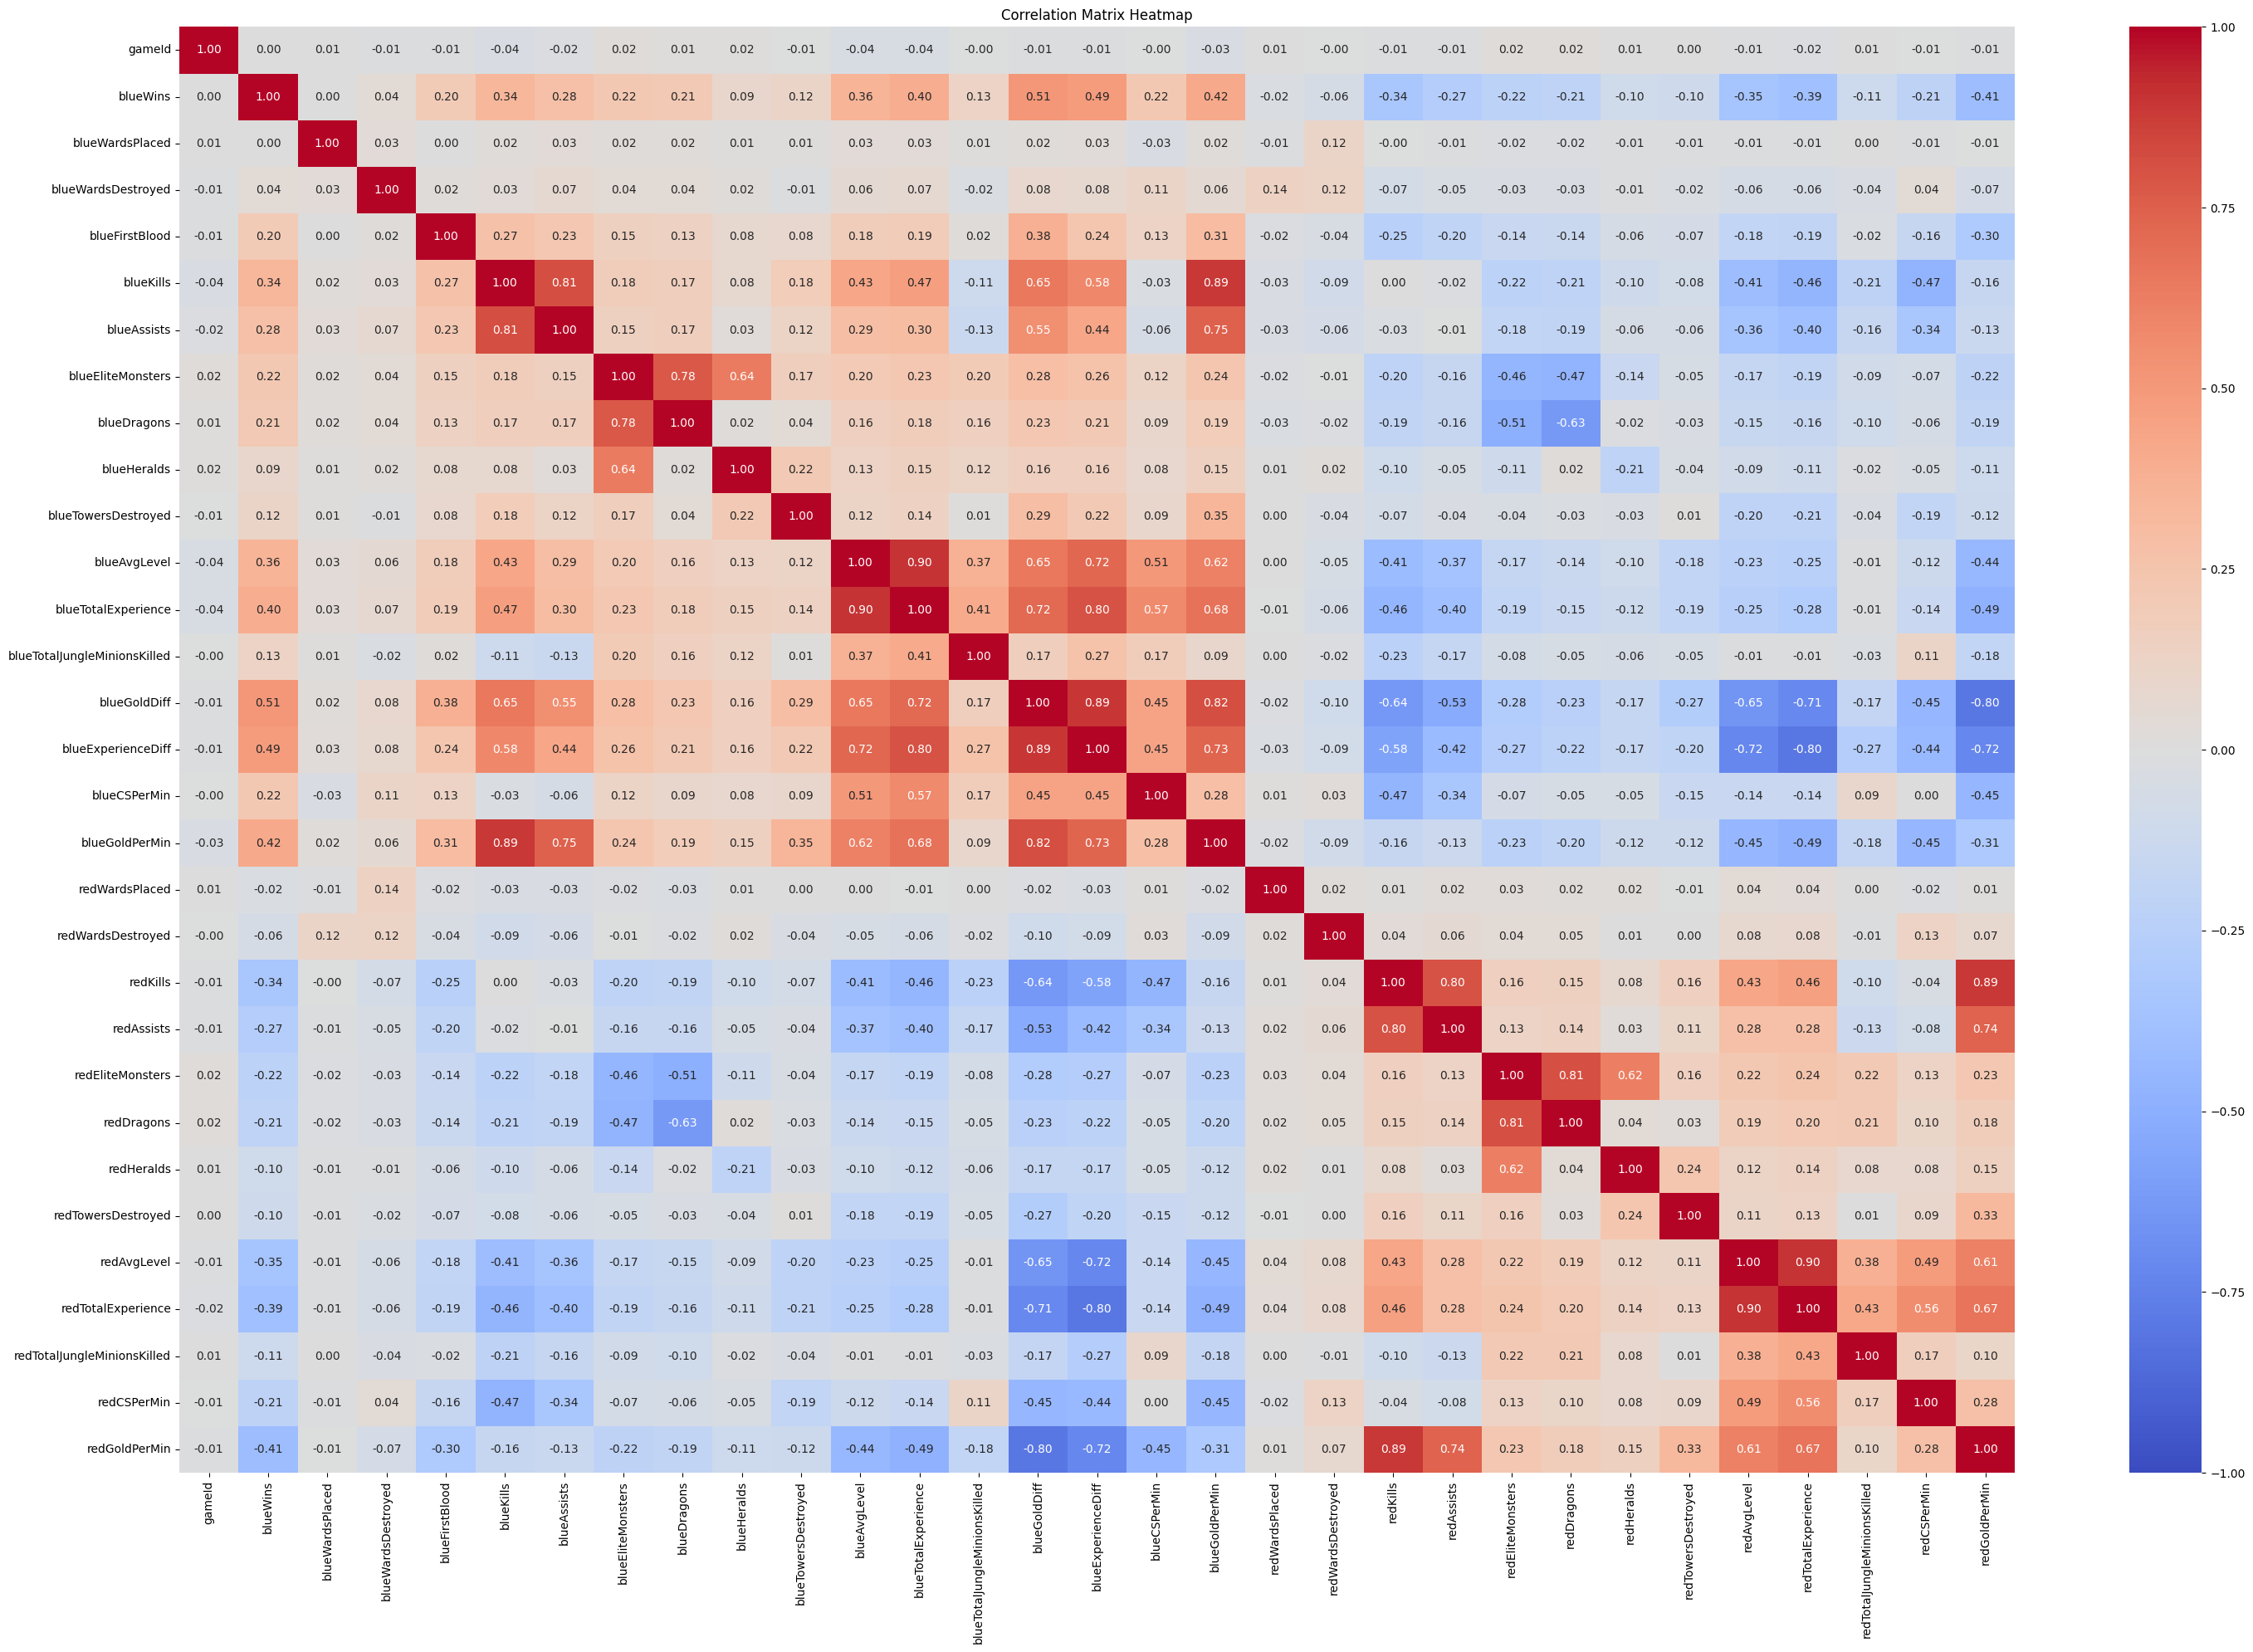


Highest Correlations:
redAvgLevel — redTotalExperience: 0.9017
blueAvgLevel — blueTotalExperience: 0.9013
blueGoldDiff — blueExperienceDiff: 0.8947
blueKills — blueGoldPerMin: 0.8888
redKills — redGoldPerMin: 0.8857
blueGoldDiff — blueGoldPerMin: 0.8168
blueKills — blueAssists: 0.8137
redEliteMonsters — redDragons: 0.8112
blueGoldDiff — redGoldPerMin: -0.8043
redKills — redAssists: 0.8040


In [14]:
# Add this to your notebook to compute and visualize correlations

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Find highest correlations (excluding self-correlations)
high_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold for "high" correlation
            high_correlations.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      correlation_matrix.iloc[i, j]))

# Sort by absolute correlation value
high_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nHighest Correlations:")
for var1, var2, corr in high_correlations[:10]:  # Show top 10
    print(f"{var1} — {var2}: {corr:.4f}")